# Visualization of Data

## Instructions

### Visualization of the german credit data
You need to **work collaboratively** to finish this task. The objective is
- To gain insights from the data via visualization and
- Identify groups of good credit risk and bad credit risk (i.e. good loan takers and bad loan takers).

This is the continuation of the previous task. You can find the data `german_credit_data.csv` saved under the [data](../data) folder.<br>
NOTE: **You can check the reference website**    

You already answered the questions in the previous task. Now we want to **visualize the finding below**.

- What are mean age, mean credit amount, and duration?
- What are the major three purpose of loan?
- What is the majoriry loan taker? Male of female?<br>

In order to gain the insights required, you may ask youself<br>
For both good loan and bad loan takers:
- What is the distrubition of purpose of loan?
- What is the distribution of age?
- What is the distribution of and amount of loan?
- Is there any correlation between the purpose of loan and gender?
- Is there any correlation between the purpose of loan and age group?
- ...etc.

You can think of any other method to analyse the data. As long as you can visualize it and help to gain insights on the good and bad loan takers.

Note:
- You are **ALLOWED** to import other library or package
- You can write you own functions
- Your answers should be readable with approprate comments
- You can refer to [markdown cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) if you are not familar with Markdown

### Reference
This dataset was sourced from Kaggle: https://www.kaggle.com/uciml/german-credit

The original source is: https://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29

## Import libraries 

In [1]:
# Usual libraries are imported here
import os
import yaml
import dask.dataframe as dd
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Please perform your tasks below and answer the questions

In [3]:
data = pd.read_csv('../data/german_credit_data.csv')
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


### Distribution of purpose

In [146]:
unique,counts = np.unique(list(data['Purpose']),return_counts=True)
dict1 = dict(zip(unique,counts))
# dict1
propose_dict = {k: v for k, v in sorted(dict1.items(), key=lambda item: item[1])}

p_labels=list((propose_dict.keys()))
# propose_dict[1]
p_fracs=[propose_dict.get(p_labels[i]) for i in range(len(p_labels))]
print(p_labels)
print(p_fracs)

['domestic appliances', 'vacation/others', 'repairs', 'education', 'business', 'furniture/equipment', 'radio/TV', 'car']
[12, 12, 22, 59, 97, 181, 280, 337]


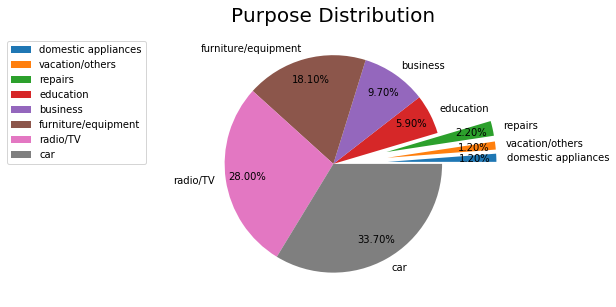

In [151]:
fig=plt.figure(figsize=(7,5))
# plt.pie(x=p_fracs, labels=p_labels,autopct='%3.1f %%',shadow=True, labeldistance=1.1, startangle = 90,pctdistance = 0.6)
plt.pie(x=p_fracs, labels=p_labels, autopct='%.2f%%',pctdistance=0.8,explode=(0.5,0.5,0.5,0,0,0,0,0))
plt.title('Purpose Distribution',fontsize=20)
plt.legend(loc=(-0.7,0.5))
plt.show()

### Distribution of gender

In [152]:
data[['Sex','Age']].groupby('Sex').count()

,Age
Sex,
female,310
male,690


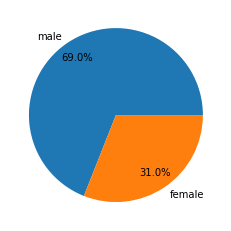

In [159]:
plt.figure()
plt.pie(x=[690,310],labels=['male','female'],autopct='%.1f%%',pctdistance=0.8)
plt.show()

### Distribution of age

mean age is 35.546


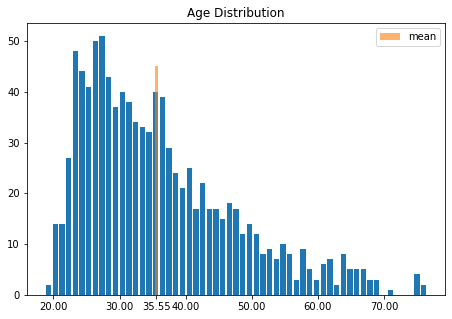

In [90]:
Age = data['Age']
mean_age = np.mean(Age)
print('mean age is',mean_age)
bin_count_age = np.bincount(Age)

min_ = np.min(Age)

plt.figure(figsize=(7.5,5))
plt.title('Age Distribution')
x = np.linspace(start = 0,stop = len(bin_count_age),num = len(bin_count_age))
plt.bar(x[min_:],bin_count_age[min_:],tick_label = None)
# plt.bar(mean_age,45,alpha=0.6,width=0.4,label='mean',tick_label = mean_age)
plt.bar(mean_age,45,alpha=0.6,width=0.4,label='mean')
plt.legend()

# x_ticks = np.append(plt.gca().get_xticks(), 35.546)
# x_ticks = np.append([i for i in range(20,85,10)],35.546)
# x_ticks = [20, 30.   , 40.   , 50.   , 60.   , 70.   , 35.546]
x_ticks = [20, 30, 40, 50, 60, 70 , 35.546]
# print(x_ticks)

plt.gca().set_xticks(x_ticks)

# plt.hist(Age,rwidth=0.8)
# plt.hist(bin_count_age)
plt.show()

### Distribution of duration

mean duration is 20.903


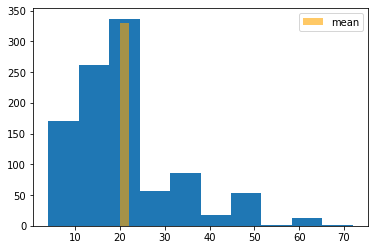

In [103]:
duration = data['Duration']
mean_duration = np.mean(duration)
print('mean duration is',mean_duration)
plt.hist(duration)
plt.bar(mean_duration,330,alpha=0.6,width=2,label='mean',color='orange')
# bin_count_duration = np.bincount(duration)
# print(bin_count_duration)
# min_ = np.min(duration)
# plt.figure(figsize=(10,8))
# plt.title('Duration Distribution')
# x = np.linspace(start = 0,stop = len(bin_count_duration),num = len(bin_count_duration))
# plt.bar(x[min_:],bin_count_duration[min_:],tick_label = None)
plt.legend()
plt.show()

### Distribution of credit amount

mean credit_amount is 3271.258


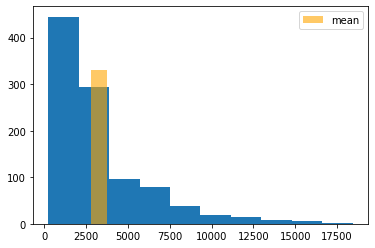

In [107]:
credit_amount = data['Credit amount']
mean_credit_amount = np.mean(credit_amount)
print('mean credit_amount is',mean_credit_amount)
plt.hist(credit_amount)
plt.bar(mean_credit_amount,330,alpha=0.6,width=1000,label='mean',color='orange')
# # bin_count_duration = np.bincount(duration)
# # print(bin_count_duration)
# # min_ = np.min(duration)
# # plt.figure(figsize=(10,8))
# # plt.title('Duration Distribution')
# # x = np.linspace(start = 0,stop = len(bin_count_duration),num = len(bin_count_duration))
# # plt.bar(x[min_:],bin_count_duration[min_:],tick_label = None)
plt.legend()
plt.show()